<a href="https://colab.research.google.com/github/aronbarbosag/data-analysis-python/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pergunta para responder:
##Há um conflito de interesse para um site que  vende ingressos para um filme e exibe avaliaçoes sobre o filme ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango_df = pd.read_csv('../data/fandango_scrape.csv')

In [3]:
all_sites_df = pd.read_csv('../data/all_sites_scores.csv')

In [4]:
fandango_df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango_df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## Q1- Alguma relação entre popularidade e as avaliações ?

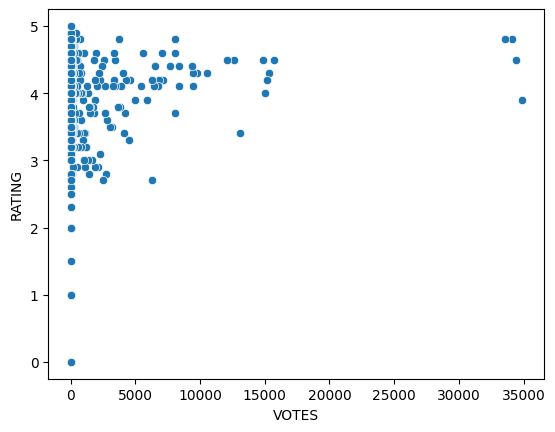

In [7]:
sns.scatterplot(data=fandango_df,x='VOTES',y='RATING')
plt.show()

Resposta Q1: Aparentemente não existe relação, pelo menos não linearmente.

In [8]:
fandango_df.select_dtypes('number').corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [9]:
import re

## Extrair o ano do titulo do filme e criar uma coluna
#### Ex: Ant-Man (2015)	 ---> Coluna Year com valor 2015

In [10]:
def strip_year(col:str):
  year =(re.search(r'[0-9]{4}',col)).group()
  return int(year)

In [11]:
fandango_df['YEAR']=fandango_df['FILM'].apply(strip_year)

In [12]:
fandango_df.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


#### Q2 Quantos filmes existem no Fandango DataFrame por ano ?

In [13]:
fandango_df[fandango_df['YEAR']== 1001]

,FILM,STARS,RATING,VOTES,YEAR
385,1001 Grams (2015),3.0,3.0,2,1001


In [14]:
fandango_df.loc[fandango_df['YEAR']== 1001,'YEAR'] = 2015

In [15]:
fandango_df.iloc[385]

FILM      1001 Grams (2015)
STARS                   3.0
RATING                  3.0
VOTES                     2
YEAR                   2015
Name: 385, dtype: object

In [16]:
fandango_df[fandango_df['YEAR']== 1964]

,FILM,STARS,RATING,VOTES,YEAR
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [17]:
fandango_df[fandango_df['YEAR']== 2014].head(30)

,FILM,STARS,RATING,VOTES,YEAR
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
9,Into the Woods (2014),3.5,3.4,13055,2014
14,Unbroken (2014),4.5,4.1,9443,2014
21,The Imitation Game (2014),5.0,4.6,8055,2014
24,Selma (2014),5.0,4.6,7025,2014
25,Annie (2014),4.5,4.2,6835,2014
33,Night at the Museum: Secret of the Tomb (2014),4.5,4.1,5445,2014
38,Birdman (2014),4.0,3.7,4194,2014
50,Top Five (2014),4.0,3.5,3223,2014
73,Big Eyes (2014),4.0,3.8,1501,2014


In [18]:
fandango_df.groupby('YEAR')['FILM'].count().sort_values(ascending=False)

YEAR
2015    477
2014     24
1964      1
2012      1
2016      1
Name: FILM, dtype: int64

In [19]:
fandango_groupby_year_film=fandango_df.groupby('YEAR',as_index=False)['FILM'].count().sort_values(by='FILM',ascending=False)

In [20]:
fandango_groupby_year_film['YEAR']

3    2015
2    2014
0    1964
1    2012
4    2016
Name: YEAR, dtype: int64

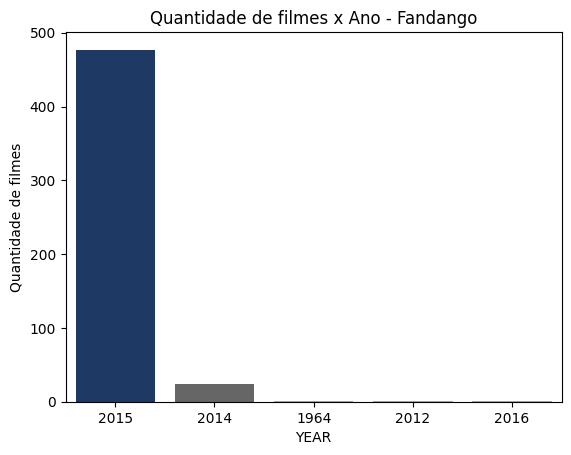

In [21]:
sns.barplot(data=fandango_groupby_year_film,x='YEAR',y='FILM',palette=["#aaaaaa","#aaaaaa","#666666","#123670", "#aaaaaa"], hue='YEAR',legend=False, order=fandango_groupby_year_film['YEAR'])
plt.title('Quantidade de filmes x Ano - Fandango')
plt.ylabel('Quantidade de filmes')
plt.show()

#### Qual os 10 filmes que tem maior numero de votos ?

In [22]:
fandango_df.sort_values(by='VOTES',ascending=False).head(10)

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [23]:
fandango_df[fandango_df['VOTES']==0]

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [24]:
index_remover = fandango_df[fandango_df['VOTES']==0].index

In [25]:
index_remover

Index([435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503],
      dtype='int64')

In [26]:
new_fandango_df = fandango_df.drop(index_remover,axis=0)

In [27]:
new_fandango_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    435 non-null    object 
 1   STARS   435 non-null    float64
 2   RATING  435 non-null    float64
 3   VOTES   435 non-null    int64  
 4   YEAR    435 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 17.1+ KB


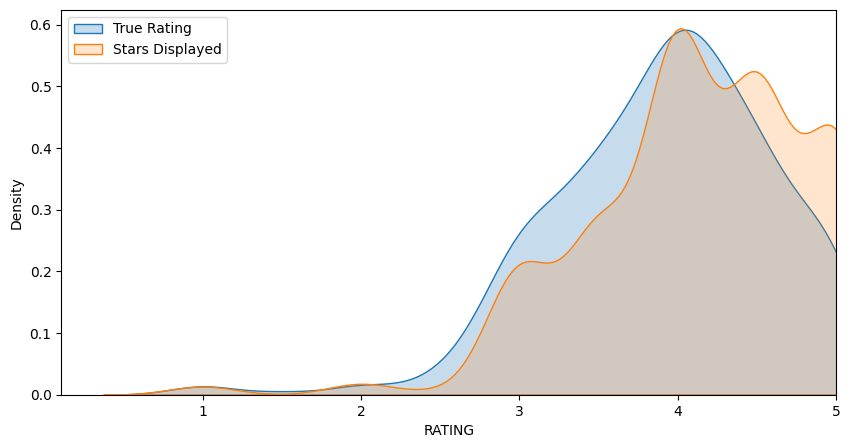

In [28]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=new_fandango_df,x='RATING',fill=True)
sns.kdeplot(data=new_fandango_df,x='STARS',fill=True,alpha=0.2)

plt.xlim(right=5)
plt.legend(['True Rating','Stars Displayed'])
plt.show()

In [29]:
new_fandango_df['STARS_DIFF']  = np.round(new_fandango_df['STARS'] - new_fandango_df['RATING'],1)
new_fandango_df.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


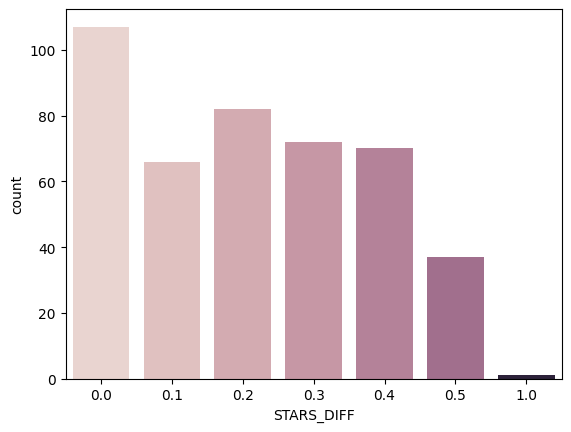

In [30]:
sns.countplot(data=new_fandango_df,x='STARS_DIFF',hue='STARS_DIFF',legend=False)
plt.show()

In [31]:
new_fandango_df[new_fandango_df['STARS_DIFF']==1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [32]:
all_sites_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [33]:
all_sites_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [34]:
all_sites_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


In [35]:
all_sites_df['RottenTomatoes'].corr(all_sites_df['RottenTomatoes_User'])

np.float64(0.781439628201966)

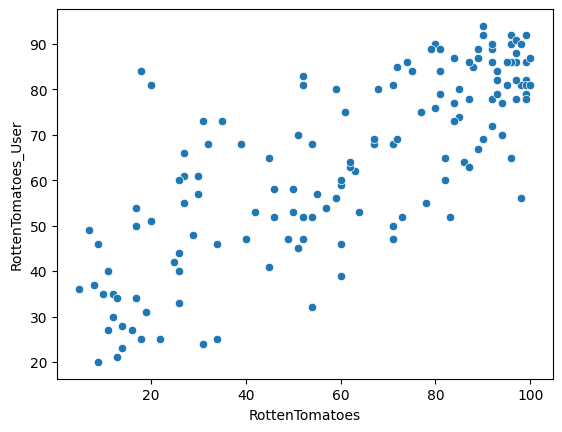

In [36]:
sns.scatterplot(data=all_sites_df,x='RottenTomatoes',y='RottenTomatoes_User')
plt.show()

#### No geral, parece que quando os usuários gostam do filme os críticos também gostam

valores perto de zero significa que existe um consenso entre críticos e público comum<br>
valores positivos significa que os críticos avaliaram mais alto que o público comum<br>
valores negativos significa que o público comum avaliou mais alto que a crítica

In [37]:
all_sites_df['Rotten_Diff'] = all_sites_df['RottenTomatoes'] - all_sites_df['RottenTomatoes_User']

In [38]:
all_sites_df['Rotten_Diff'].describe()

count    146.000000
mean      -3.027397
std       19.156684
min      -66.000000
25%      -14.000000
50%        0.000000
75%       10.750000
max       42.000000
Name: Rotten_Diff, dtype: float64

In [39]:
rotten_diff_mean = np.mean(np.abs(all_sites_df['Rotten_Diff']))
rotten_diff_mean

np.float64(15.095890410958905)

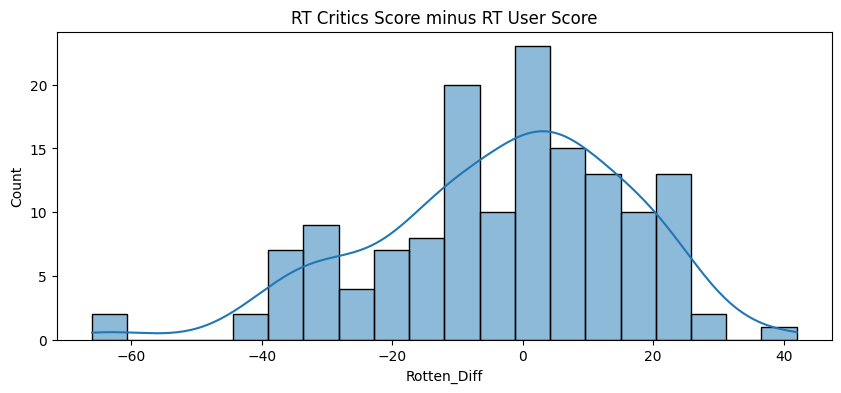

In [40]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites_df,x='Rotten_Diff',bins=20,kde=True)
plt.title("RT Critics Score minus RT User Score")
plt.show()

In [41]:
all_sites_df[(all_sites_df['Rotten_Diff'] < 11) & (all_sites_df['Rotten_Diff'] >= 0) ].shape

(38, 9)

In [42]:
all_sites_abs_diff=all_sites_df.copy()
all_sites_abs_diff['Rotten_Diff'] = np.abs(all_sites_abs_diff['Rotten_Diff'])

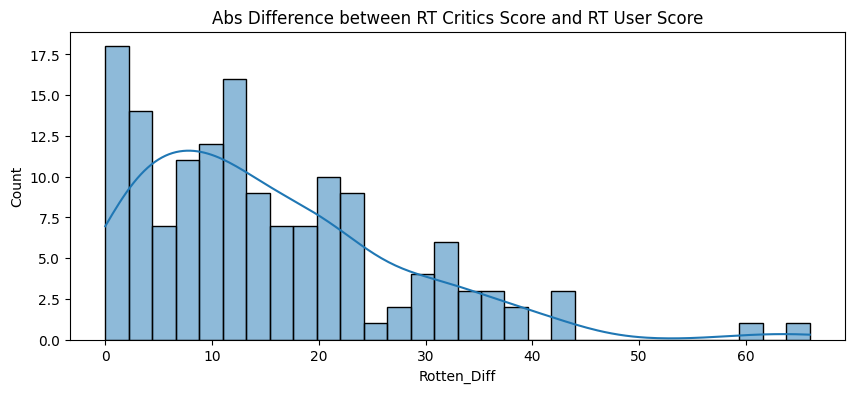

In [43]:
plt.figure(figsize=(10,4))
sns.histplot(data=all_sites_abs_diff,x='Rotten_Diff',kde=True,bins=30)
plt.title('Abs Difference between RT Critics Score and RT User Score')
plt.show()

#### Qual os top 5 filmes que os usuários avaliaram mais alto que os críticos

In [44]:
all_sites_df.sort_values(by='Rotten_Diff',ascending=True)[['FILM','Rotten_Diff']].head()

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


#### Qual os top 5 filmes que os críticos avaliaram mais alto que os usuários

In [45]:
all_sites_df.sort_values(by='Rotten_Diff',ascending=False)[['FILM','Rotten_Diff']].head()

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
40,I'll See You In My Dreams (2015),24
145,"Kumiko, The Treasure Hunter (2015)",24


In [46]:
all_sites_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


#### MetaCritic

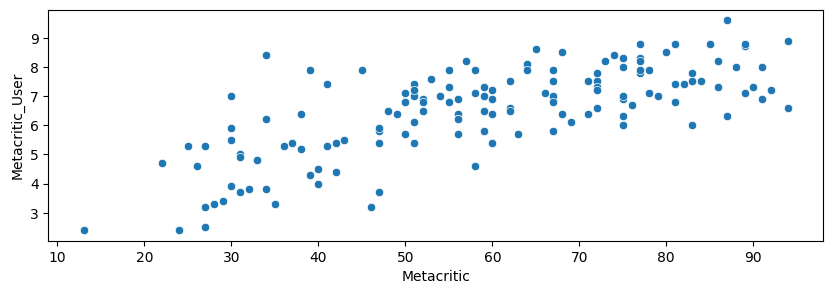

In [47]:
plt.figure(figsize=(10,3))
sns.scatterplot(data=all_sites_df,x='Metacritic',y='Metacritic_User')
plt.show()

#### IMDB

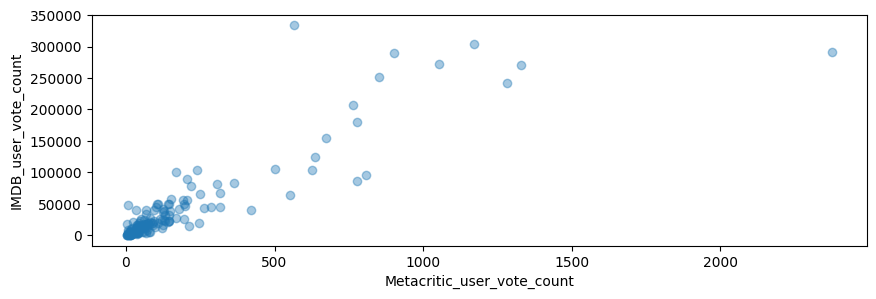

In [48]:
plt.figure(figsize=(10,3))
plt.scatter(x=all_sites_df['Metacritic_user_vote_count'],y=all_sites_df['IMDB_user_vote_count'],alpha=.4)
plt.xlabel('Metacritic_user_vote_count')
plt.ylabel('IMDB_user_vote_count')
plt.show()

<span>Qual filme teve o maior voto IMDB ?</span>

In [49]:
all_sites_df[all_sites_df['IMDB_user_vote_count'] == all_sites_df['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


<span>Qual filme teve maior voto de usuários no MetaCritic</span>

In [50]:
all_sites_df[all_sites_df['Metacritic_user_vote_count'] == all_sites_df['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [51]:
fandango_all_sites = fandango_df.merge(all_sites_df,on='FILM',how='inner',suffixes=('_fandango',''))

In [52]:
fandango_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    int64  
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(8), object(1)


In [53]:
fandango_all_sites.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [54]:
norm_scores = fandango_all_sites.copy()

In [55]:
norm_scores['RottenTomatoes'] = np.round(norm_scores['RottenTomatoes']/20,1)
norm_scores['RottenTomatoes_User'] = np.round(norm_scores['RottenTomatoes_User']/20,1)
norm_scores['Metacritic'] = np.round(norm_scores['Metacritic']/20,1)
norm_scores['Metacritic_User'] = np.round(norm_scores['Metacritic_User']/2,1)
norm_scores['IMDB'] = np.round(norm_scores['IMDB']/2,1)


In [56]:
norm_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,4.9,4.5,4.7,4.4,4.3,807,96252,8


In [57]:
norm_scores.rename(columns={'RottenTomatoes':'RT_Norm', "RottenTomatoes_User":"RTU_Norm",'Metacritic':'Meta_Norm',"Metacritic_User":"Meta_U_Norm","IMDB":'IMDB_Norm'},inplace=True)

In [59]:
columns_i_want=norm_scores[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

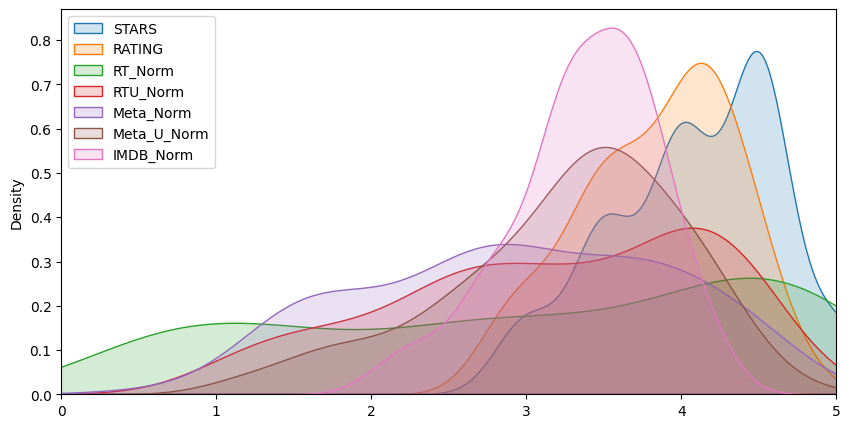

In [65]:
plt.figure(figsize=(10,5))
plt.xlim(right=5)
sns.kdeplot(data=columns_i_want,x='STARS',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='RATING',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='RT_Norm',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='RTU_Norm',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='Meta_Norm',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='Meta_U_Norm',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='IMDB_Norm',fill=True,alpha=.2)
plt.legend(['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm'])
plt.xlabel('')
plt.show()

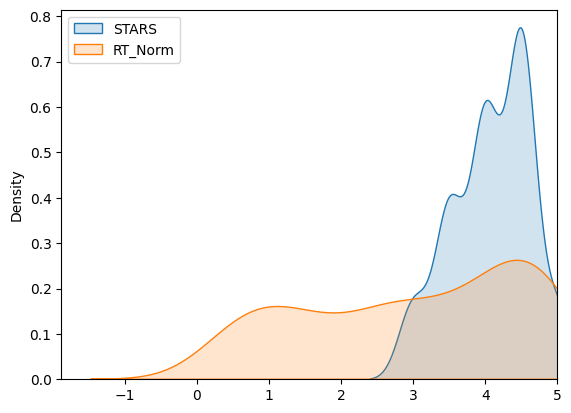

In [67]:
sns.kdeplot(data=columns_i_want,x='STARS',fill=True,alpha=.2)
sns.kdeplot(data=columns_i_want,x='RT_Norm',fill=True,alpha=.2)
plt.legend(['STARS','RT_Norm'])
plt.xlabel('')
plt.xlim(right=5)
plt.show()